In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize
import json

with open("./data_collection.json") as f:
    data = json.loads(f.read())
print("Robot: ", data["duck"])
map_data = data["map_data"]
data = data["data"]

df = pd.DataFrame(data)
df = df.set_index("sample")
df

Robot:  DUCKVADER


,Positions,Inputs,Notes
sample,,,
Left circle,"[[0.5828549931435344, 2.260032743558054, -1.50...","[[0.12, 0.4], [0.12, 0.4], [0.12, 0.4], [0.12,...",Angular speed is wrong
Straight,"[[0.31610534813331903, 2.9663534569084686, -0....","[[0.4, 0.4], [0.4, 0.4], [0.4, 0.4], [0.4, 0.4...",None
Back,"[[1.527203050216432, 1.130807079190915, -1.111...","[[-0.5, -0.5], [-0.5, -0.5], [-0.5, -0.5], [-0...",None
Right circle,"[[1.1846456511238752, 2.7809238853907283, -0.9...","[[0.5, 0.15], [0.5, 0.15], [0.5, 0.15], [0.5, ...",None
Straight line calibrated,"[[0.29815961535562246, 2.979839822281533, -1.5...","[[0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5...",None
Left circle calibrated,"[[1.064313836164062, 1.6532245944953257, 0.038...","[[0.15, 0.5], [0.15, 0.5], [0.15, 0.5], [0.15,...",None
Right circle calibrated,"[[1.094857572670193, 2.517572183283877, 0.2655...","[[0.5, 0.15], [0.5, 0.15], [0.5, 0.15], [0.5, ...",None
Backward calibrated,"[[0.6732136774254198, 0.857132173006317, -1.49...","[[-0.5, -0.5], [-0.5, -0.5], [-0.5, -0.5], [-0...",None
Left circle max speed,"[[-0.01380166650430956, -0.021668978088875968,...","[[0.6, 1.0], [0.6, 1.0], [0.6, 1.0], [0.6, 1.0...",


In [29]:
plt.rcParams["figure.figsize"] = (8,8)

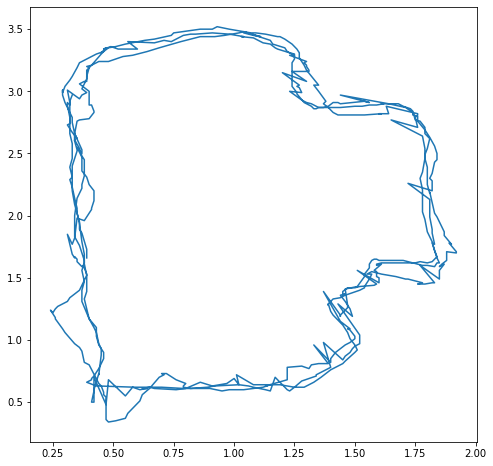

In [30]:
plt.plot(*np.array(df.loc["MPC Loop"].Positions)[:,:2].T)

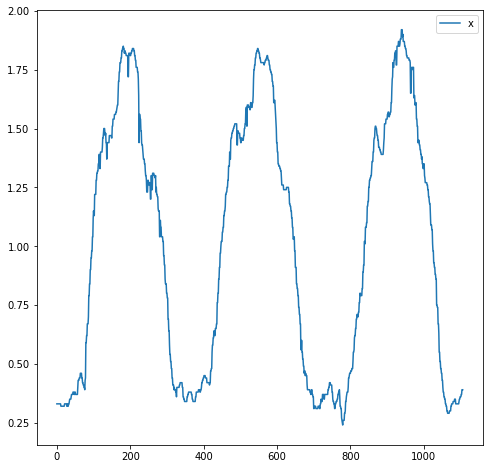

In [31]:
plt.plot(np.array(df.loc["MPC Loop"].Positions)[:,0], label="x")
plt.legend()

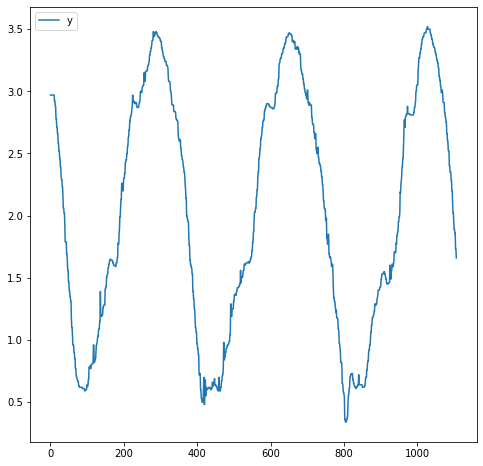

In [32]:
plt.plot(np.array(df.loc["MPC Loop"].Positions)[:,1], label="y")
plt.legend()

In [33]:
def normalize_batch(batch):
    return (batch - batch.min())/ (batch.max()-batch.min())

In [34]:
def denormalize_values(batch):
    return (batch.max()-batch.min()), batch.min()

In [35]:
denormalize_values(np.array(df.loc["MPC Loop"].Positions)[:,0])

(1.68, 0.24)

In [36]:
np.array(df.loc["MPC Loop"].Positions)[:,0].min(), np.array(df.loc["MPC Loop"].Positions)[:,0].max()

(0.24, 1.92)

In [37]:
1.92-0.24

1.68

In [38]:
np.array(df.loc["MPC Loop"].Positions)[:,1].min(), np.array(df.loc["MPC Loop"].Positions)[:,1].max()

(0.34, 3.52)

In [39]:
3.52-0.34

3.18

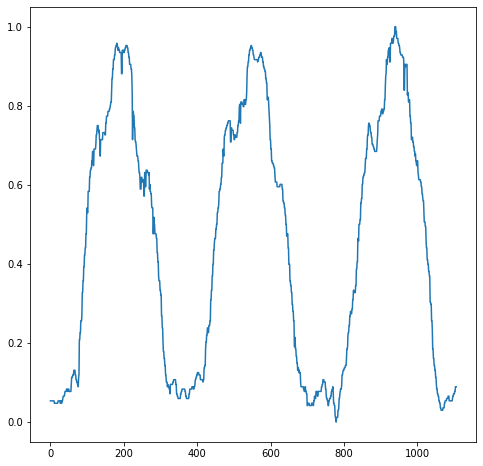

In [40]:
plt.plot(normalize_batch(np.array(df.loc["MPC Loop"].Positions)[:,0]))

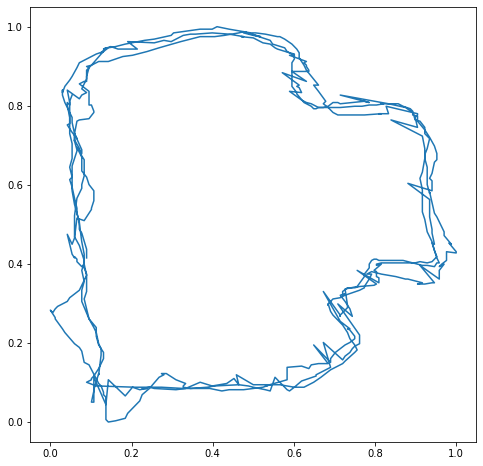

In [41]:
plt.plot(normalize_batch(np.array(df.loc["MPC Loop"].Positions)[:,0]), normalize_batch(np.array(df.loc["MPC Loop"].Positions)[:,1]))

In [42]:
def generate_batches(df, rows):
    batches = []
    inputs = []
    for el in rows:
        x = np.array(df.loc[el].Positions)[:,0]
        y = np.array(df.loc[el].Positions)[:,1]
        theta = np.array(df.loc[el].Positions)[:,2]
        x_normalized = normalize_batch(x)
        y_normalized = normalize_batch(y)
        theta_normalized = theta
        batches.append(np.array([x_normalized, y_normalized, theta_normalized]).T)
        inputs.append(np.array(df.loc[el].Inputs))
    return batches, inputs

In [43]:
MPC_TIME = 0.1
def F(action, x0, y0, theta0, u1=5, u2=0, u3=0, w1=4, w2=0, w3=0, u_alpha_r=1.5, u_alpha_l=1.5, w_alpha_r=15, w_alpha_l=15, v0=0, w0=0, dt=MPC_TIME):
    # wr, wl
    U = np.array([action[1], action[0]])
    V = U.reshape(U.size, 1)
    V = np.clip(V, -1, +1)

    ## Calculate Dynamics
    # nonlinear Dynamics - autonomous response
    f_dynamic = np.array([[-u1*v0 - u2*w0 + u3*w0**2], [-w1*w0 - w2*v0 - w3*v0*w0]])  
    #input Matrix
    B = np.array([[u_alpha_r, u_alpha_l], [w_alpha_r, -w_alpha_l]])
    # forced response
    f_forced = np.matmul(B, V)
    # acceleration
    x_dot_dot, w_dot_dot = f_dynamic + f_forced

    v1 = v0 + x_dot_dot[0]*dt
    w1 = w0 + w_dot_dot[0]*dt

    # Runge Kutta
    x1 = x0 + v0*dt*np.cos(theta0 + w0*dt/2)
    y1 = y0 + v0*dt*np.sin(theta0 + w0*dt/2)
    theta1 = theta0 + w0*dt

    return x1, y1, theta1, v1, w1

In [44]:
horizon = 2

batch_names = ["MPC Loops", "MPC watchtower high freq", "Straight line calibrated", "Left circle calibrated", "Right circle calibrated"]

def fun(u1=5, u2=0, u3=0, w1=4, w2=0, w3=0, u_alpha_r=1.5, u_alpha_l=1.5, w_alpha_r=15, w_alpha_l=15):
    batches, inputs = generate_batches(df, batch_names)
    for batch, input in zip(batches, inputs):
        batch, input = np.array(batch), np.array(input)
        errors = []
        v0, w0 = 0, 0
        theta0 = batch[0,2]
        for i in range(batch.shape[0]-horizon):
            x0, y0 = batch[i,0], batch[i,1]
            _, _, theta, v, w = F(input[i], x0, y0, theta0, u1, u2, u3, w1, w2, w3, u_alpha_r, u_alpha_l, w_alpha_r, w_alpha_l, v0, w0)
            for h in range(horizon):
                x0, y0, theta0, v0, w0 = F(input[i+h], x0, y0, theta0, v0=v0, w0=w0)
                errors.append(np.sqrt((x0-batch[i+1,0])**2 + (y0-batch[i+1,1])**2))
            theta0, v0, w0 = theta, v, w
    return np.mean(errors)

def fun_plot(df, batch_name, horizon, x0=None, u1=5, u2=0, u3=0, w1=4, w2=0, w3=0, u_alpha_r=1.5, u_alpha_l=1.5, w_alpha_r=15, w_alpha_l=15):
    if x0 is not None:
        u1, u2, u3, w1, w2, w3, u_alpha_r, u_alpha_l, w_alpha_r, w_alpha_l = x0
    batch, input = np.array(df.loc[batch_name].Positions), np.array(df.loc[batch_name].Inputs)
    points = []
    v0, w0 = 0, 0
    theta0 = batch[0,2]
    for i in range(batch.shape[0]-horizon):
        x0, y0 = batch[i,0], batch[i,1]
        _, _, theta, v, w = F(input[i], x0, y0, theta0, u1, u2, u3, w1, w2, w3, u_alpha_r, u_alpha_l, w_alpha_r, w_alpha_l, v0, w0)
        for h in range(horizon):
            x0, y0, theta0, v0, w0 = F(input[i+h], x0, y0, theta0, v0=v0, w0=w0)
            points.append([x0, y0, theta0, v0, w0])
        theta0, v0, w0 = theta, v, w
    return np.array(points), batch, input

In [45]:
f"With default parameters the mse is {fun()}"

'With default parameters the mse is 0.06113413869501719'

In [46]:
n_points = 10
x0 = np.ones(n_points)
bnds = [[-30,30]]*n_points
fun_to_minimize = lambda x: fun(u1=x[0], u2=x[1], u3=x[2], w1=x[3], w2=x[4], w3=x[5], u_alpha_r=x[6], u_alpha_l=x[7], w_alpha_r=x[8], w_alpha_l=x[9])
res = optimize.minimize(fun_to_minimize, x0, method="SLSQP", bounds=bnds)
res

     fun: 0.0414026490511867
     jac: array([ 7.03167170e-05,  2.15132255e-04,  4.09106724e-05,  1.39757060e-04,
        5.31449914e-05, -9.63406637e-06,  1.10263471e-04,  3.67546920e-04,
        9.07927752e-05, -3.02642584e-04])
 message: 'Optimization terminated successfully'
    nfev: 124
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([ 3.51843   , -0.40282789,  0.2789241 ,  1.41903836,  0.16628764,
        1.52162695,  0.54710851, -0.50963813,  1.08095586,  0.73014709])

In [47]:
parameters = res.x
#parameters = np.append(parameters, [15,15])

In [48]:
f"With new parameters it is: {fun_to_minimize(parameters)}, with default it is: {fun()}"

'With new parameters it is: 0.0414026490511867, with default it is: 0.06113413869501719'

In [49]:
batch, actions = generate_batches(df, ["MPC Loop"])
batch, actions = np.array(batch[0]), np.array(actions[0])

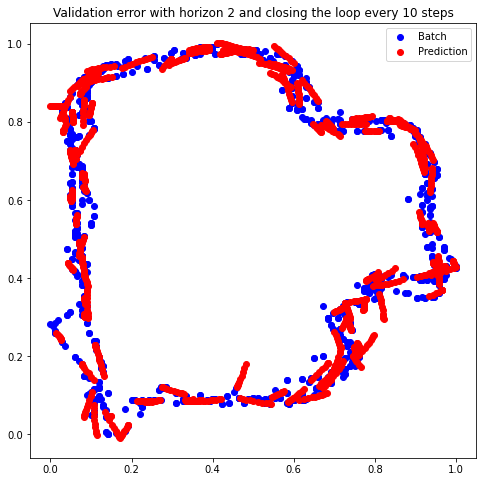

In [55]:
plt.scatter(*batch[:,:2].T, c="b", label="Batch")
x0, y0, theta0 = batch[0]
v0, w0 = 0, 0
open_loop = [[x0, y0, theta0, v0, w0]]
for i in range(0, actions.shape[0]-1):
    x0, y0, theta0, v0, w0 = F(actions[i], x0, y0, theta0, v0=v0, w0=w0, u1=parameters[0], u2=parameters[1], u3=parameters[2], w1=parameters[3], w2=parameters[4], w3=parameters[5], u_alpha_r=parameters[6], u_alpha_l=parameters[7], w_alpha_r=parameters[8], w_alpha_l=parameters[9])
    open_loop.append([x0, y0, theta0, v0, w0])
    if i % 10 == 0:
        x0, y0, theta0 = batch[i]
open_loop = np.array(open_loop)
error = np.array(open_loop[:,:2]) - np.array(batch[:,:2])
plt.scatter(*open_loop[:,:2].T, c="r", label="Prediction")
plt.title(f"Validation error with horizon {horizon} and closing the loop every 10 steps")
plt.legend()

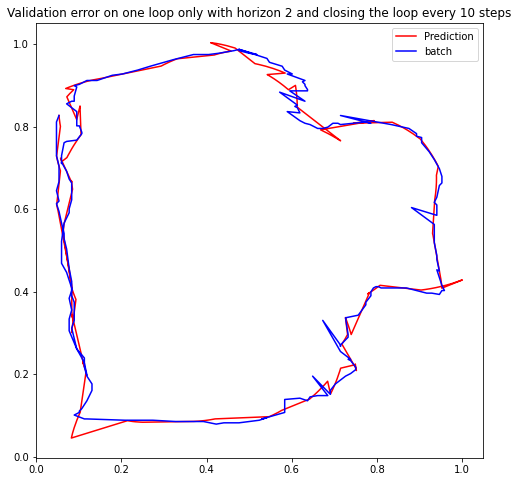

In [56]:
plt.plot(*open_loop[:400,:2].T, c="r", label="Prediction")
plt.plot(*batch[:400,:2].T, c="b", label="batch")
plt.title(f"Validation error on one loop only with horizon {horizon} and closing the loop every 10 steps")
plt.legend()

In [52]:
print("Error on x: {} cm^2, y: {} cm^2".format(*np.mean(np.square(error), axis=0)))

Error on x: 0.001911885911695283 cm^2, y: 0.001865896172524046 cm^2


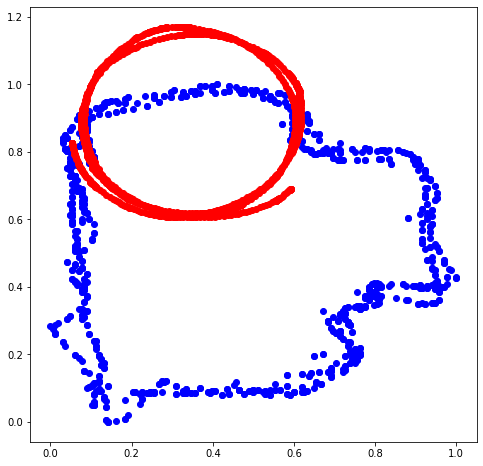

In [53]:
plt.scatter(*batch[:,:2].T, c="b", label="Batch")
x0, y0, theta0 = batch[0]
v0, w0 = 0, 0
open_loop = [[x0, y0, theta0, v0, w0]]
for i in range(0, actions.shape[0]-1):
    x0, y0, theta0, v0, w0 = F(actions[i], x0, y0, theta0, v0=v0, w0=w0, u1=parameters[0], u2=parameters[1], u3=parameters[2], w1=parameters[3], w2=parameters[4], w3=parameters[5], u_alpha_r=parameters[6], u_alpha_l=parameters[7], w_alpha_r=parameters[8], w_alpha_l=parameters[9])
    open_loop.append([x0, y0, theta0, v0, w0])
open_loop = np.array(open_loop)
plt.scatter(*open_loop[:,:2].T, c="r", label="Prediction")